**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Armando De La Rosa
*   MATRÍCULA: A01570376

In [1]:
!pip install seaborn
!pip install matplotlib
!pip install Jinja2


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas? 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


 2. Determina el porcentaje de valores faltantes por columna.

In [5]:
import random
ex1, ex2, ex3 = random.sample(range(len(df)), 3)

print("Dataframe total rows: ", len(df))
df_info = pd.DataFrame(data=df.dtypes)
missing_values_total = df.notnull().sum() 
missing_values_percent = round((1 - missing_values_total / len(df)) * 100, 2).astype(str) + " %"

column_length = df.apply(len)  
unique_values_count = df.nunique() 

final_df = pd.concat([df_info[0].rename("Data Type"),
                      df.T[ex1].rename("Example 1"),
                      df.T[ex2].rename("Example 2"),
                      df.T[ex3].rename("Example 3"),
                      column_length.rename("Column Length"),                      
                      missing_values_total.rename("Total Not Missing"),
                      missing_values_percent.rename("% of missing values"),
                      unique_values_count.rename("Unique Values Count")], axis=1)
final_df

Dataframe total rows:  32581


,Data Type,Example 1,Example 2,Example 3,Column Length,Total Not Missing,% of missing values,Unique Values Count
person_age,int64,40,24,28,32581,32581,0.0 %,58
person_income,int64,1200000,46000,48000,32581,32581,0.0 %,4295
person_home_ownership,object,MORTGAGE,MORTGAGE,MORTGAGE,32581,32581,0.0 %,4
person_emp_length,float64,1.0,NaN,1.0,32581,31686,2.75 %,36
loan_intent,object,MEDICAL,MEDICAL,EDUCATION,32581,32581,0.0 %,6
loan_grade,object,A,D,A,32581,32581,0.0 %,7
loan_amnt,int64,10000,10000,10000,32581,32581,0.0 %,753
loan_int_rate,float64,NaN,15.99,6.92,32581,29465,9.56 %,348
loan_status,int64,0,1,0,32581,32581,0.0 %,2
loan_percent_income,float64,0.01,0.22,0.21,32581,32581,0.0 %,77


In [6]:
# df.info() me dijo como estaban distribuidas las columnas en númericas y cualitativas, el otro código me ayudó a ver si pandas
# había hecho una clasificación correcta de los datos, pero por ejemplo loan_status lo clasificó como int64 cuando debería ser una cualtitativa
df['loan_status'] = df['loan_status'].astype('category')


# ¿Cuántas columnas númericas hay?  
numeric_columns = df.select_dtypes(include=['int64', 'float64']).shape[1]
print("Número de columnas numéricas:", numeric_columns)
# ¿Cuántas columnas cualitativas hay?
qualitative_columns = df.select_dtypes(include=['object', 'category']).shape[1]
print("Número de columnas cualitativas:", qualitative_columns)


# El porcentjae de valores faltantes por columna... se puede revisar en la celda anterior.

Número de columnas numéricas: 7
Número de columnas cualitativas: 5


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis 
   
**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%) 

In [7]:
# Tendencia central
numeric_df  = df.select_dtypes(include=['int64', 'float64'])
mean = numeric_df.mean()
median = numeric_df.median()

print("Media:\n", mean)
print("\nMediana:\n", median)

Media:
 person_age                       27.734600
person_income                 66074.848470
person_emp_length                 4.789686
loan_amnt                      9589.371106
loan_int_rate                    11.011695
loan_percent_income               0.170203
cb_person_cred_hist_length        5.804211
dtype: float64

Mediana:
 person_age                       26.00
person_income                 55000.00
person_emp_length                 4.00
loan_amnt                      8000.00
loan_int_rate                    10.99
loan_percent_income               0.15
cb_person_cred_hist_length        4.00
dtype: float64


In [8]:
# Dispersión o variabilidad
description = numeric_df.describe()  
description

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


In [9]:
# Forma
skewness = numeric_df.skew()
kurt = numeric_df.kurt()  

print("\nAsimetría:\n", skewness)
print("\nCurtosis:\n", kurt)



Asimetría:
 person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

Curtosis:
 person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64


In [10]:
# Clasificar las variables person_age y loan_in_rate según asimetría y curtosis

def clasificar_asimetria(valor):
    return "Simétrica" if valor == 0 else ("Asimétrica positiva" if valor > 0 else "Asimétrica negativa")

def clasificar_curtosis(valor):
    return "Mesocúrtica" if valor == 0 else ("Leptocúrtica" if valor > 0 else "Platicúrtica")

print("Clasificación de person_age:")
print("Asimetría:", clasificar_asimetria(skewness['person_age']))
print("Curtosis:", clasificar_curtosis(kurt['person_age']))

print("\nClasificación de loan_in_rate:")
print("Asimetría:", clasificar_asimetria(skewness['loan_int_rate']))
print("Curtosis:", clasificar_curtosis(kurt['loan_int_rate']))

Clasificación de person_age:
Asimetría: Asimétrica positiva
Curtosis: Leptocúrtica

Clasificación de loan_in_rate:
Asimetría: Asimétrica positiva
Curtosis: Platicúrtica


4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable. 
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.
 
**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma. 

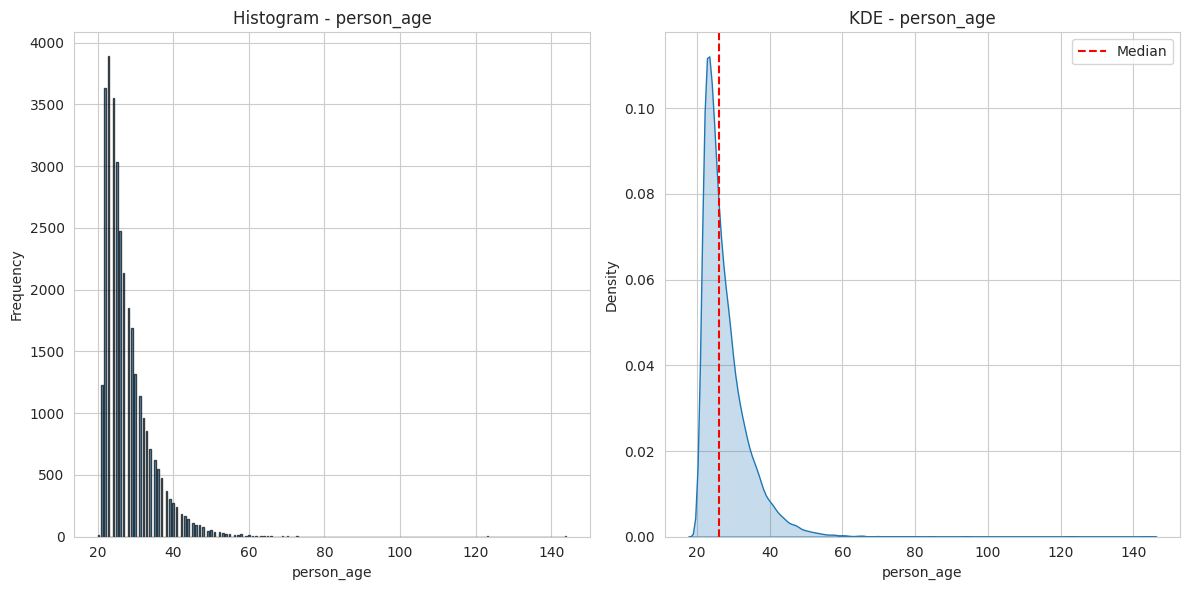

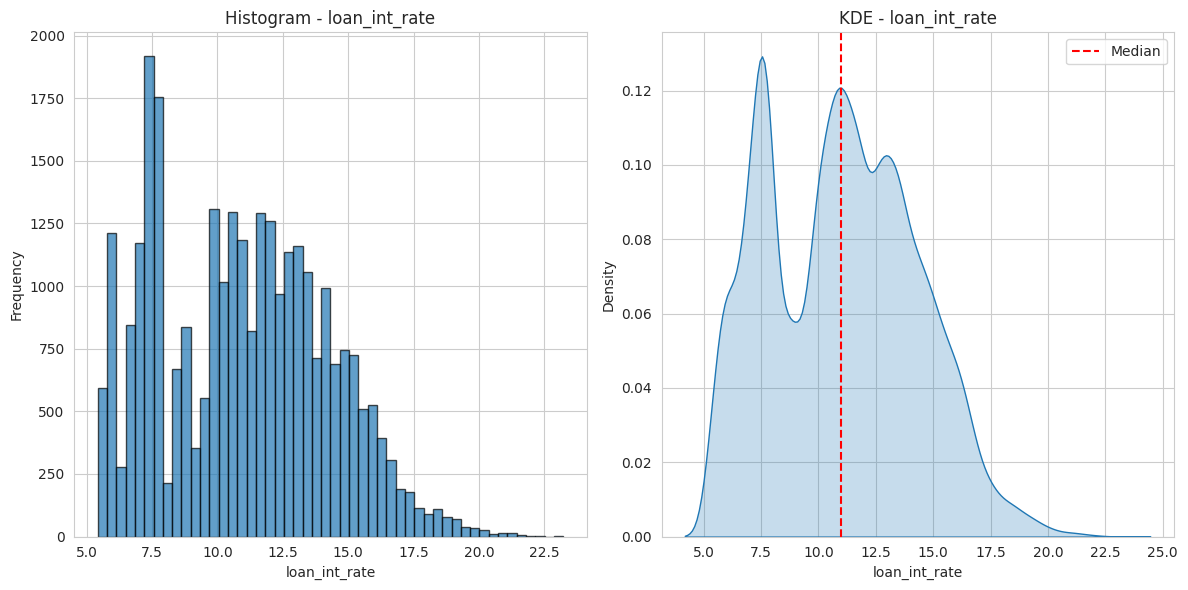

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_histogram_and_kde(column_name, dataframe, bins='fd', show_median=True, show_mean=False, color=None):

    data = dataframe[column_name].dropna()

    if not color:
        color = sns.color_palette()[0]

    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))
            
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=bins, edgecolor='black', alpha=0.7, color=color)
    plt.title(f'Histogram - {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    # KDE
    plt.subplot(1, 2, 2)
    sns.kdeplot(data, fill=True, color=color)
    if show_median:
        plt.axvline(data.median(), color='r', linestyle='--', label='Median')
    if show_mean:
        plt.axvline(data.mean(), color='b', linestyle='-', label='Mean')
    plt.title(f'KDE - {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.legend()

    plt.tight_layout()
    plt.show()


# NOTA: Se entiende que solo se hacen estos histogramas para las variables de las que se analizó la asimetría y curtosis... en la siguiente celda está el resto
analysis_column =  ['person_age', 'loan_int_rate']
plot_histogram_and_kde(analysis_column[0], numeric_df)
plot_histogram_and_kde(analysis_column[1], numeric_df)


In [12]:
# Person Age
# Efectivamente la cola se alarga hacia la derecha, por lo que es asimétrica positiva, 
# y la curtosis es leptocúrtica, lo que hace sentido con el gráfico de KDE que se ve muy picudo.

# Loan Int Rate
#  Aquí no es muy claro que sea una asimétria positiva porque no está tan cargado hacia la izquierda.. pero me hace sentido que sea platicúrtica
# porque como tal no hay un pico principal, sino varias lo que yo entendría como "plano"

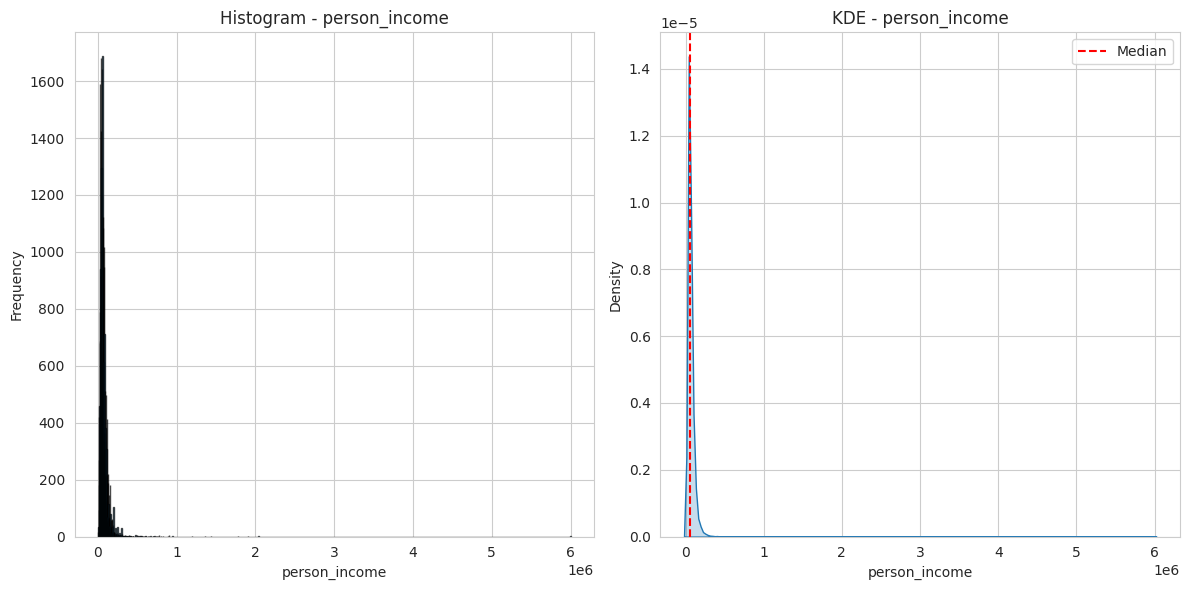

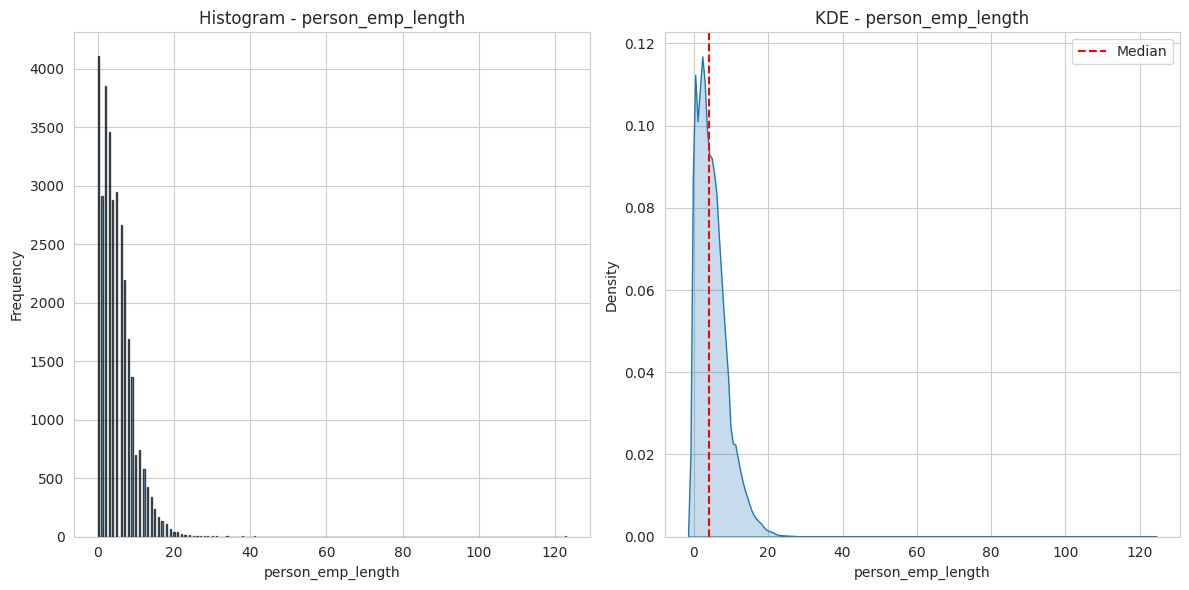

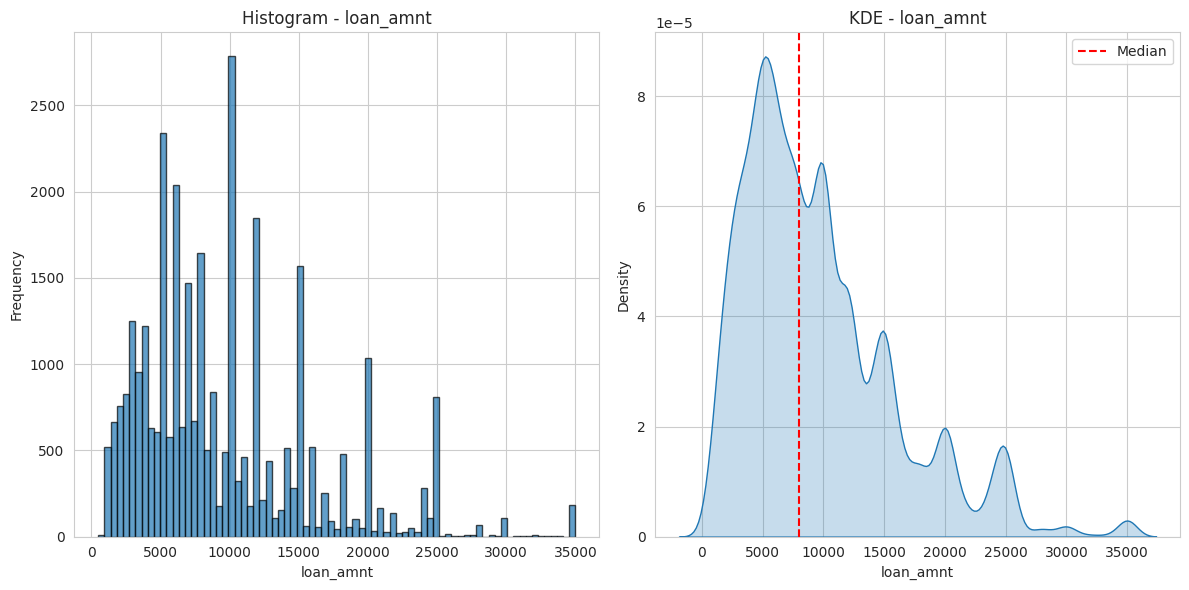

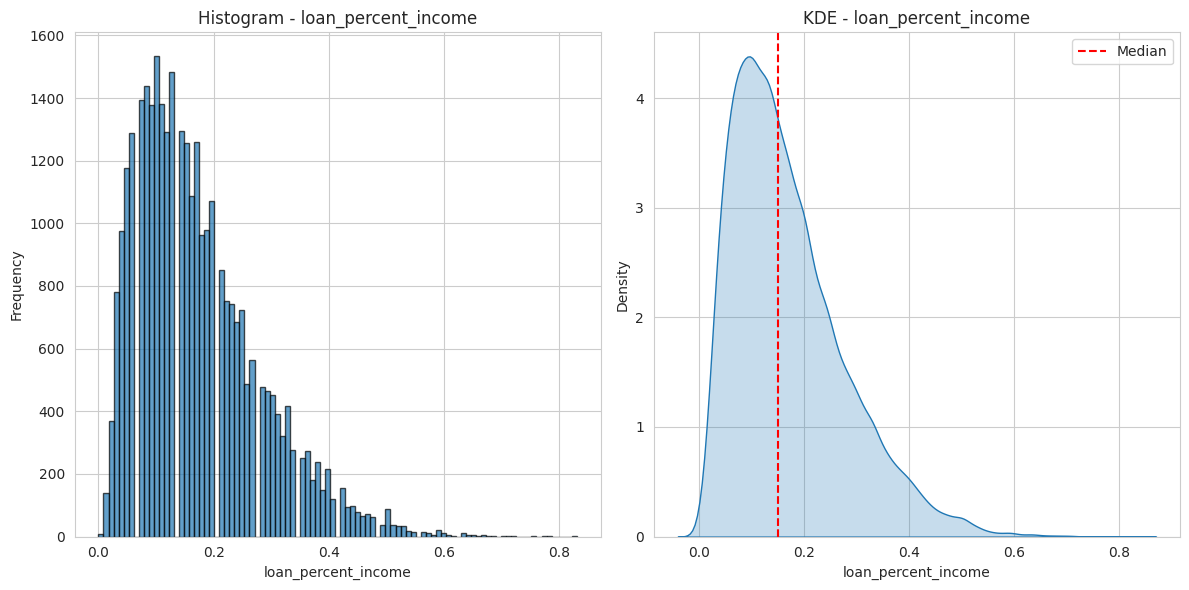

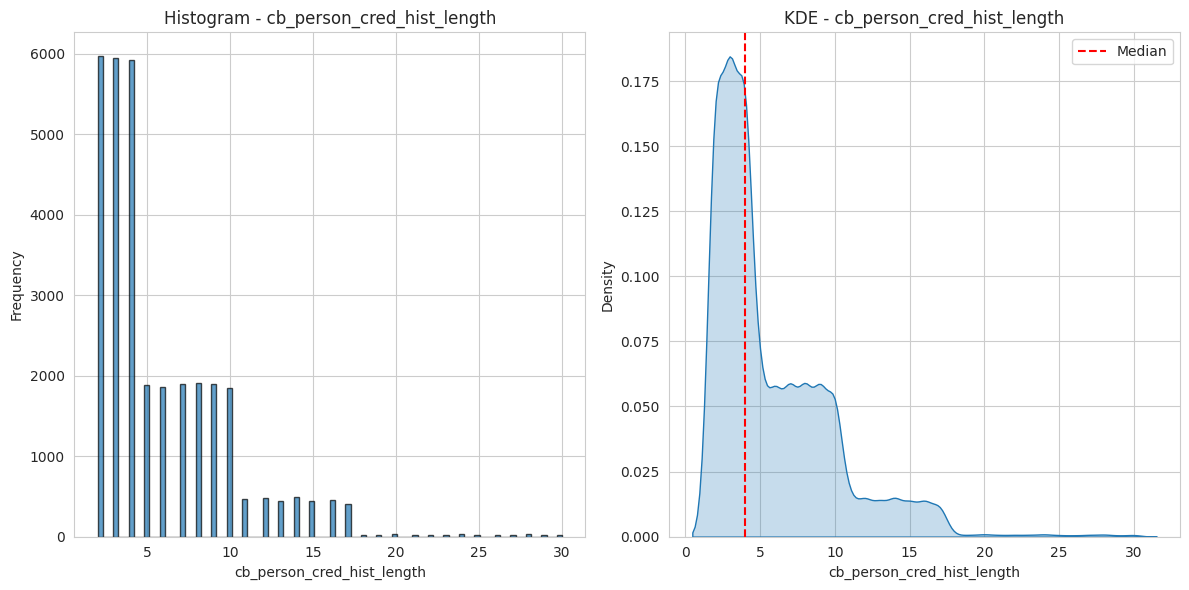

In [13]:
# Resto de histogramas
for column in numeric_df.columns :
    if column not in analysis_column:
        plot_histogram_and_kde(column, numeric_df)

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles. 

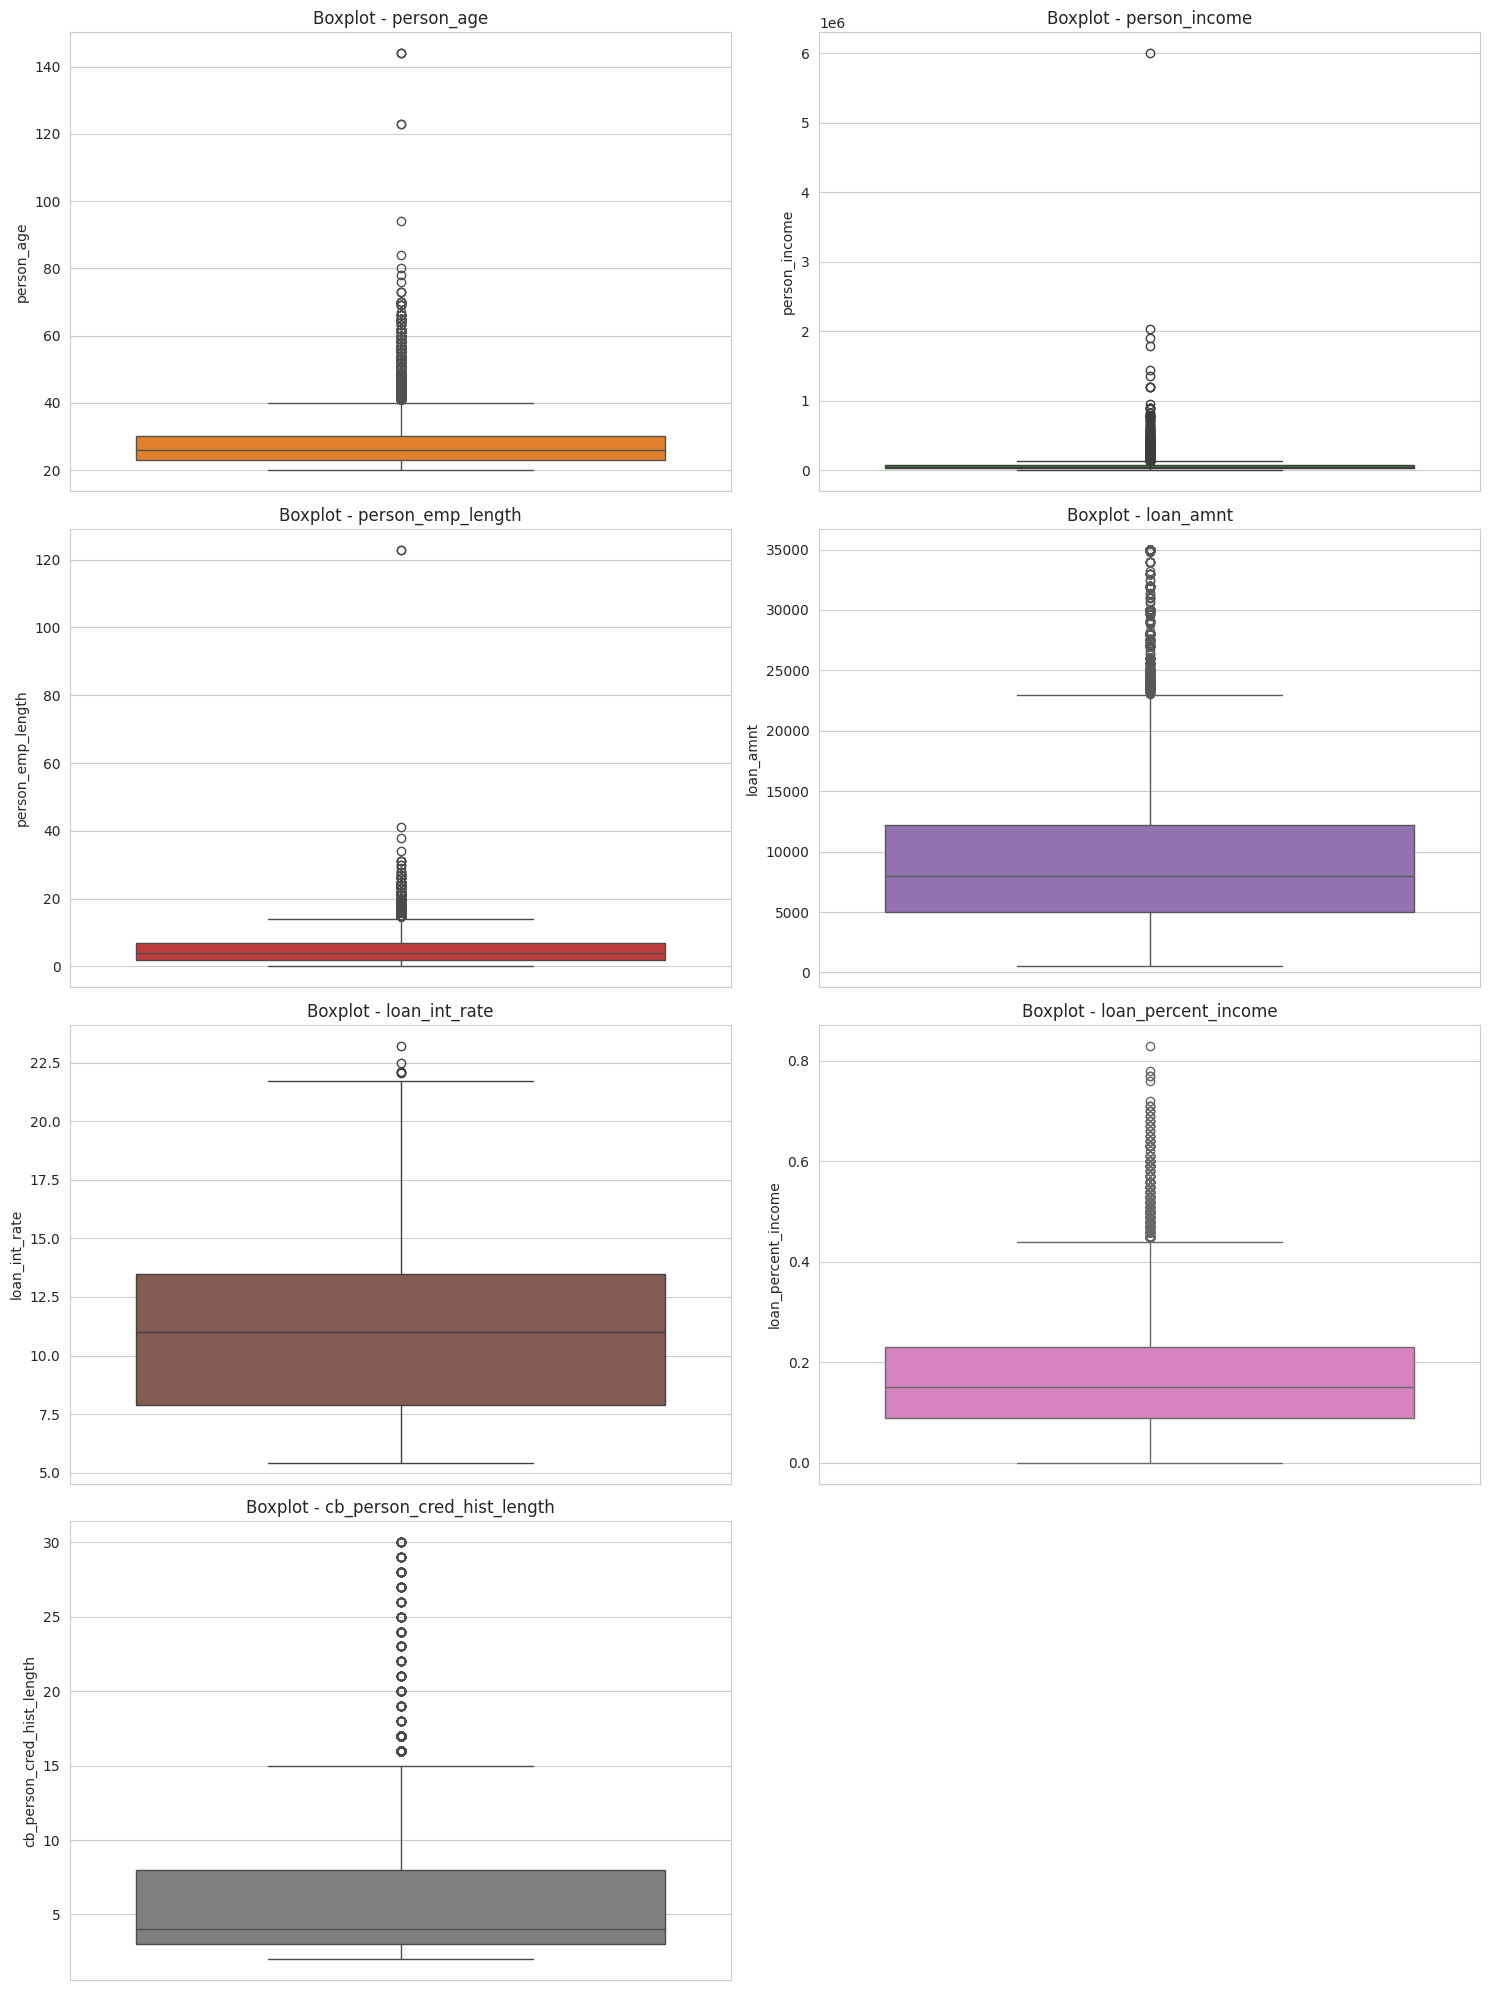

In [14]:
def plot_boxplots(dataframe):
    
    numeric_cols = dataframe.columns
    num_cols = len(numeric_cols)
    
    if num_cols % 2 == 0:
        n_rows = num_cols // 2
        n_cols = 2
    else:
        n_rows = num_cols // 2 + 1
        n_cols = 2 if num_cols != 1 else 1
    
    plt.figure(figsize=(15, 5 * n_rows))
    color_palette = sns.color_palette()  
    palette_length = len(color_palette)
    
    for idx, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, n_cols, idx)
        sns.boxplot(dataframe[col], color=color_palette[idx % palette_length])
        plt.title(f'Boxplot - {col}')
        plt.ylabel(col)
        
    plt.tight_layout()
    plt.show()

plot_boxplots(numeric_df)

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [15]:
def compute_outliers(dataframe, column_name):
    
    percentile_25 = dataframe[column_name].quantile(0.25)
    percentile_75 = dataframe[column_name].quantile(0.75)
    iqr = percentile_75 - percentile_25

    upper_limit = percentile_75 + 1.5 * iqr
    lower_limit = percentile_25 - 1.5 * iqr
    
    return dataframe[(dataframe[column_name] <= lower_limit) | (dataframe[column_name] >= upper_limit)]


IQR_outliers = compute_outliers(df, "person_age")
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables categóricas

 6. Obtén las siguientes estadísticas descriptivas para todas las variables categóricas:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)
   
**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object, que en este caso coinciden con las categóricas: `describe(include = 'object')`. Para los recuentos utiliza la función `df["columna"].value_counts()` 

In [16]:
def categorical_descriptive_stats_df(dataframe):
    
    categorical_cols = dataframe.columns
    columns, modas, cardinalities, unique_vals, val_counts = [], [], [], [], []

    for col in categorical_cols:
        mode = dataframe[col].mode()[0]
        cardinality = dataframe[col].nunique()
        
        columns.append(col)
        modas.append(mode)
        cardinalities.append(cardinality)
        unique_vals.append("")
        val_counts.append("")
        
        value_counts = dataframe[col].value_counts().to_dict()
        for unique_val, count in value_counts.items():
            columns.append("")
            modas.append("")
            cardinalities.append("")
            unique_vals.append(unique_val)
            val_counts.append(count)
    
    stats_df = pd.DataFrame({
        'Column': columns,
        'Moda': modas,
        'Cardinalidad': cardinalities,
        'Unique Value': unique_vals,
        'Count': val_counts
    })
    
    return stats_df.style.hide()


categoric_df = df.select_dtypes(include=['object', 'category'])
categorical_descriptive_stats_df(categoric_df)

Column,Moda,Cardinalidad,Unique Value,Count
person_home_ownership,RENT,4,,
,,,RENT,16446
,,,MORTGAGE,13444
,,,OWN,2584
,,,OTHER,107
loan_intent,EDUCATION,6,,
,,,EDUCATION,6453
,,,MEDICAL,6071
,,,VENTURE,5719
,,,PERSONAL,5521


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables categóricas, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x="columna", data=df) `

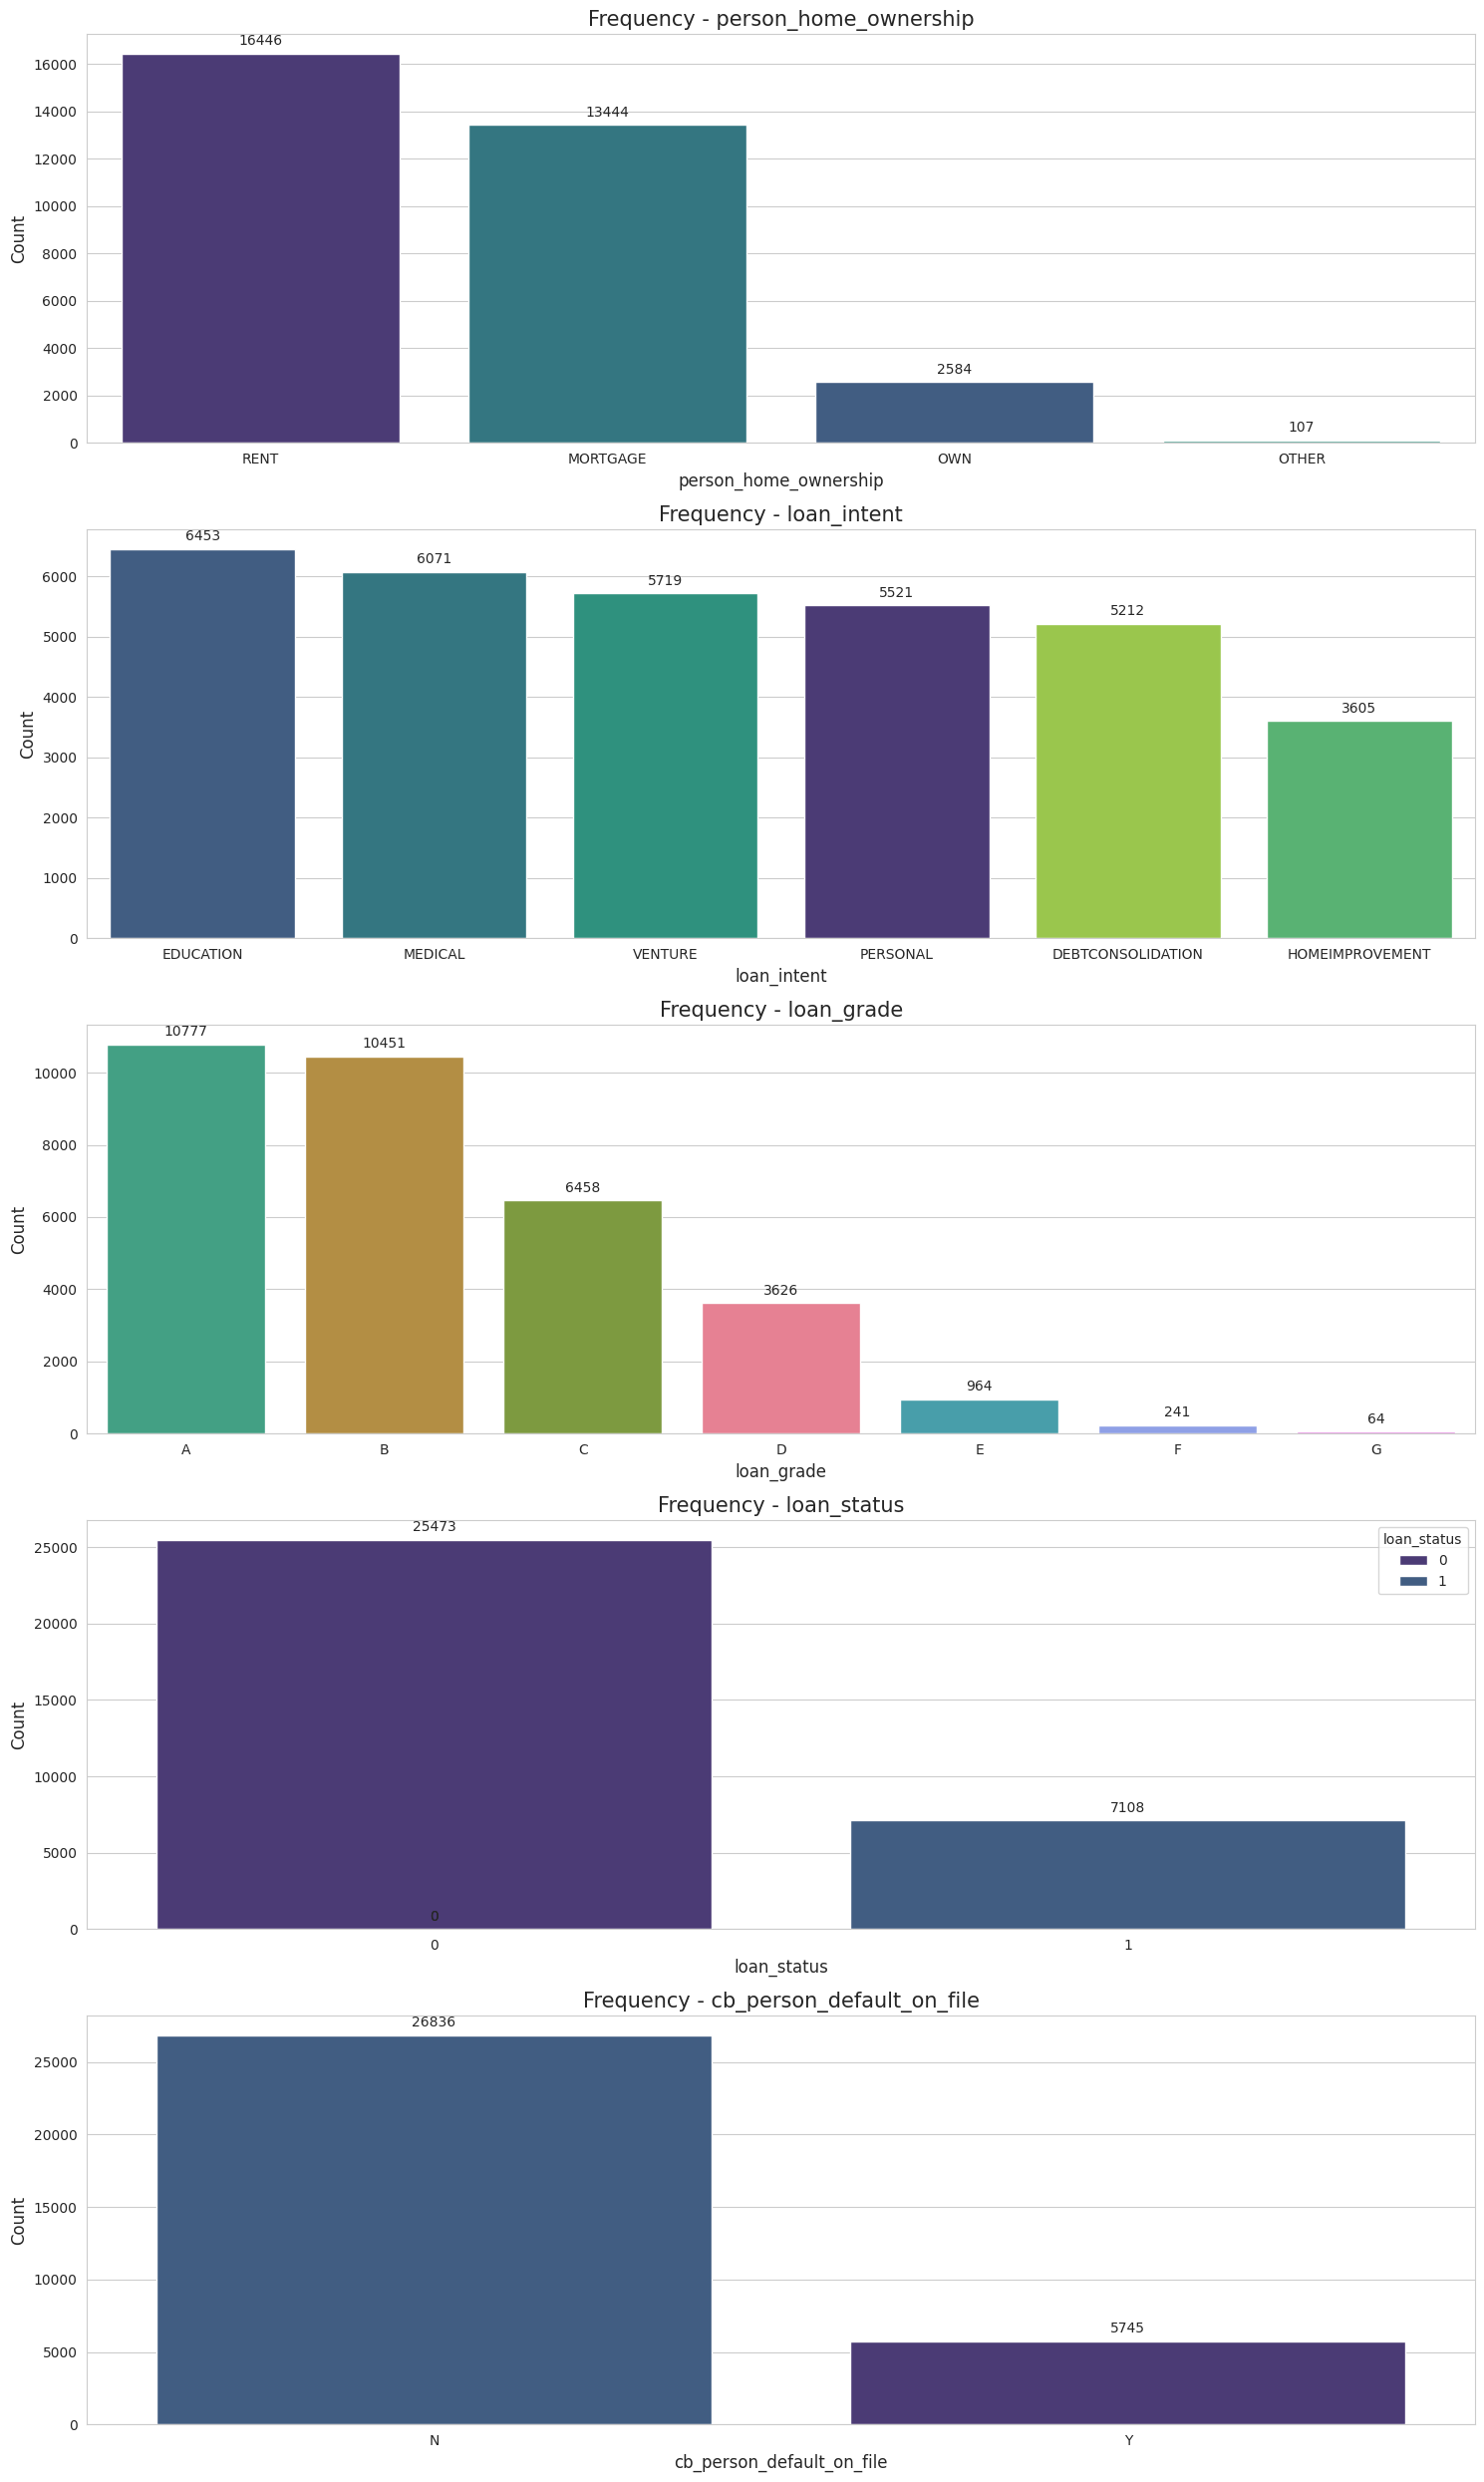

In [17]:
def plot_categorical_frequency(dataframe, hue_column=None):
    categorical_cols = dataframe.columns
    categorical_cols = [col for col in categorical_cols if col != hue_column]

    sns.set_palette("viridis")    
    plt.figure(figsize=(15, len(categorical_cols) * 5))
    
    for idx, col in enumerate(categorical_cols, start=1):
        plt.subplot(len(categorical_cols), 1, idx)
        
        hue_value = hue_column if hue_column else col
        sns.countplot(x=col, data=dataframe, order=dataframe[col].value_counts().index, hue=hue_value)
        
        plt.title(f'Frequency - {col}', fontsize=15)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        
        for p in plt.gca().patches:
            plt.gca().annotate(f'{int(p.get_height())}', 
                               (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha='center', va='center', 
                               xytext=(0, 9), 
                               textcoords='offset points', fontsize=10)
        
        plt.tight_layout()

    plt.show()

plot_categorical_frequency(categoric_df)

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos: 

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `load_status`. Interpreta el resultado.	

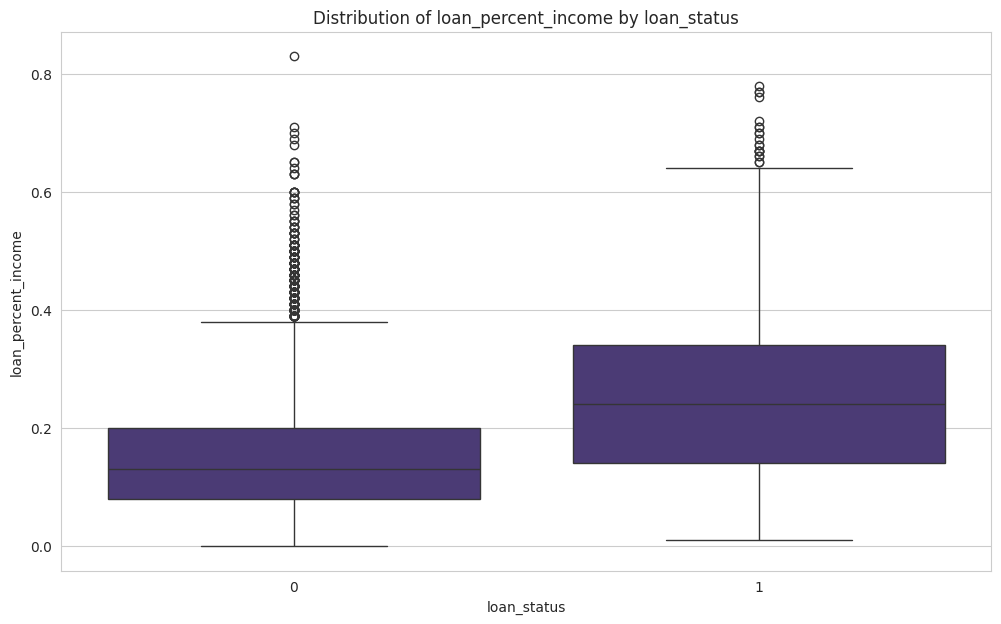

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df)
plt.title("Distribution of loan_percent_income by loan_status")
plt.show()

In [ ]:
# Lo que puedo interpretar es que la mayoría de las personas que incumplieron con el pago del préstamo tenían un porcentaje de préstamo más alto... 
# Es decir que el porcentaje de préstamo respecto a su ingreso  era más alto.
# La mediana de los incumplidores es más alta que la de los que sí cumplieron.
# EL Rango intercuartil de llos cumplidores es más pequeño que el de los incumplidores, lo que puede decir que los cumplidores están más concentrados en un rango de porcentaje de préstamo respecto a su ingreso.
#  Claro que hay outliers con porcentaje de prestamo muy alto.

# Se debería analizar contra cuanto ingreso queda después de pagar el prestamo...

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

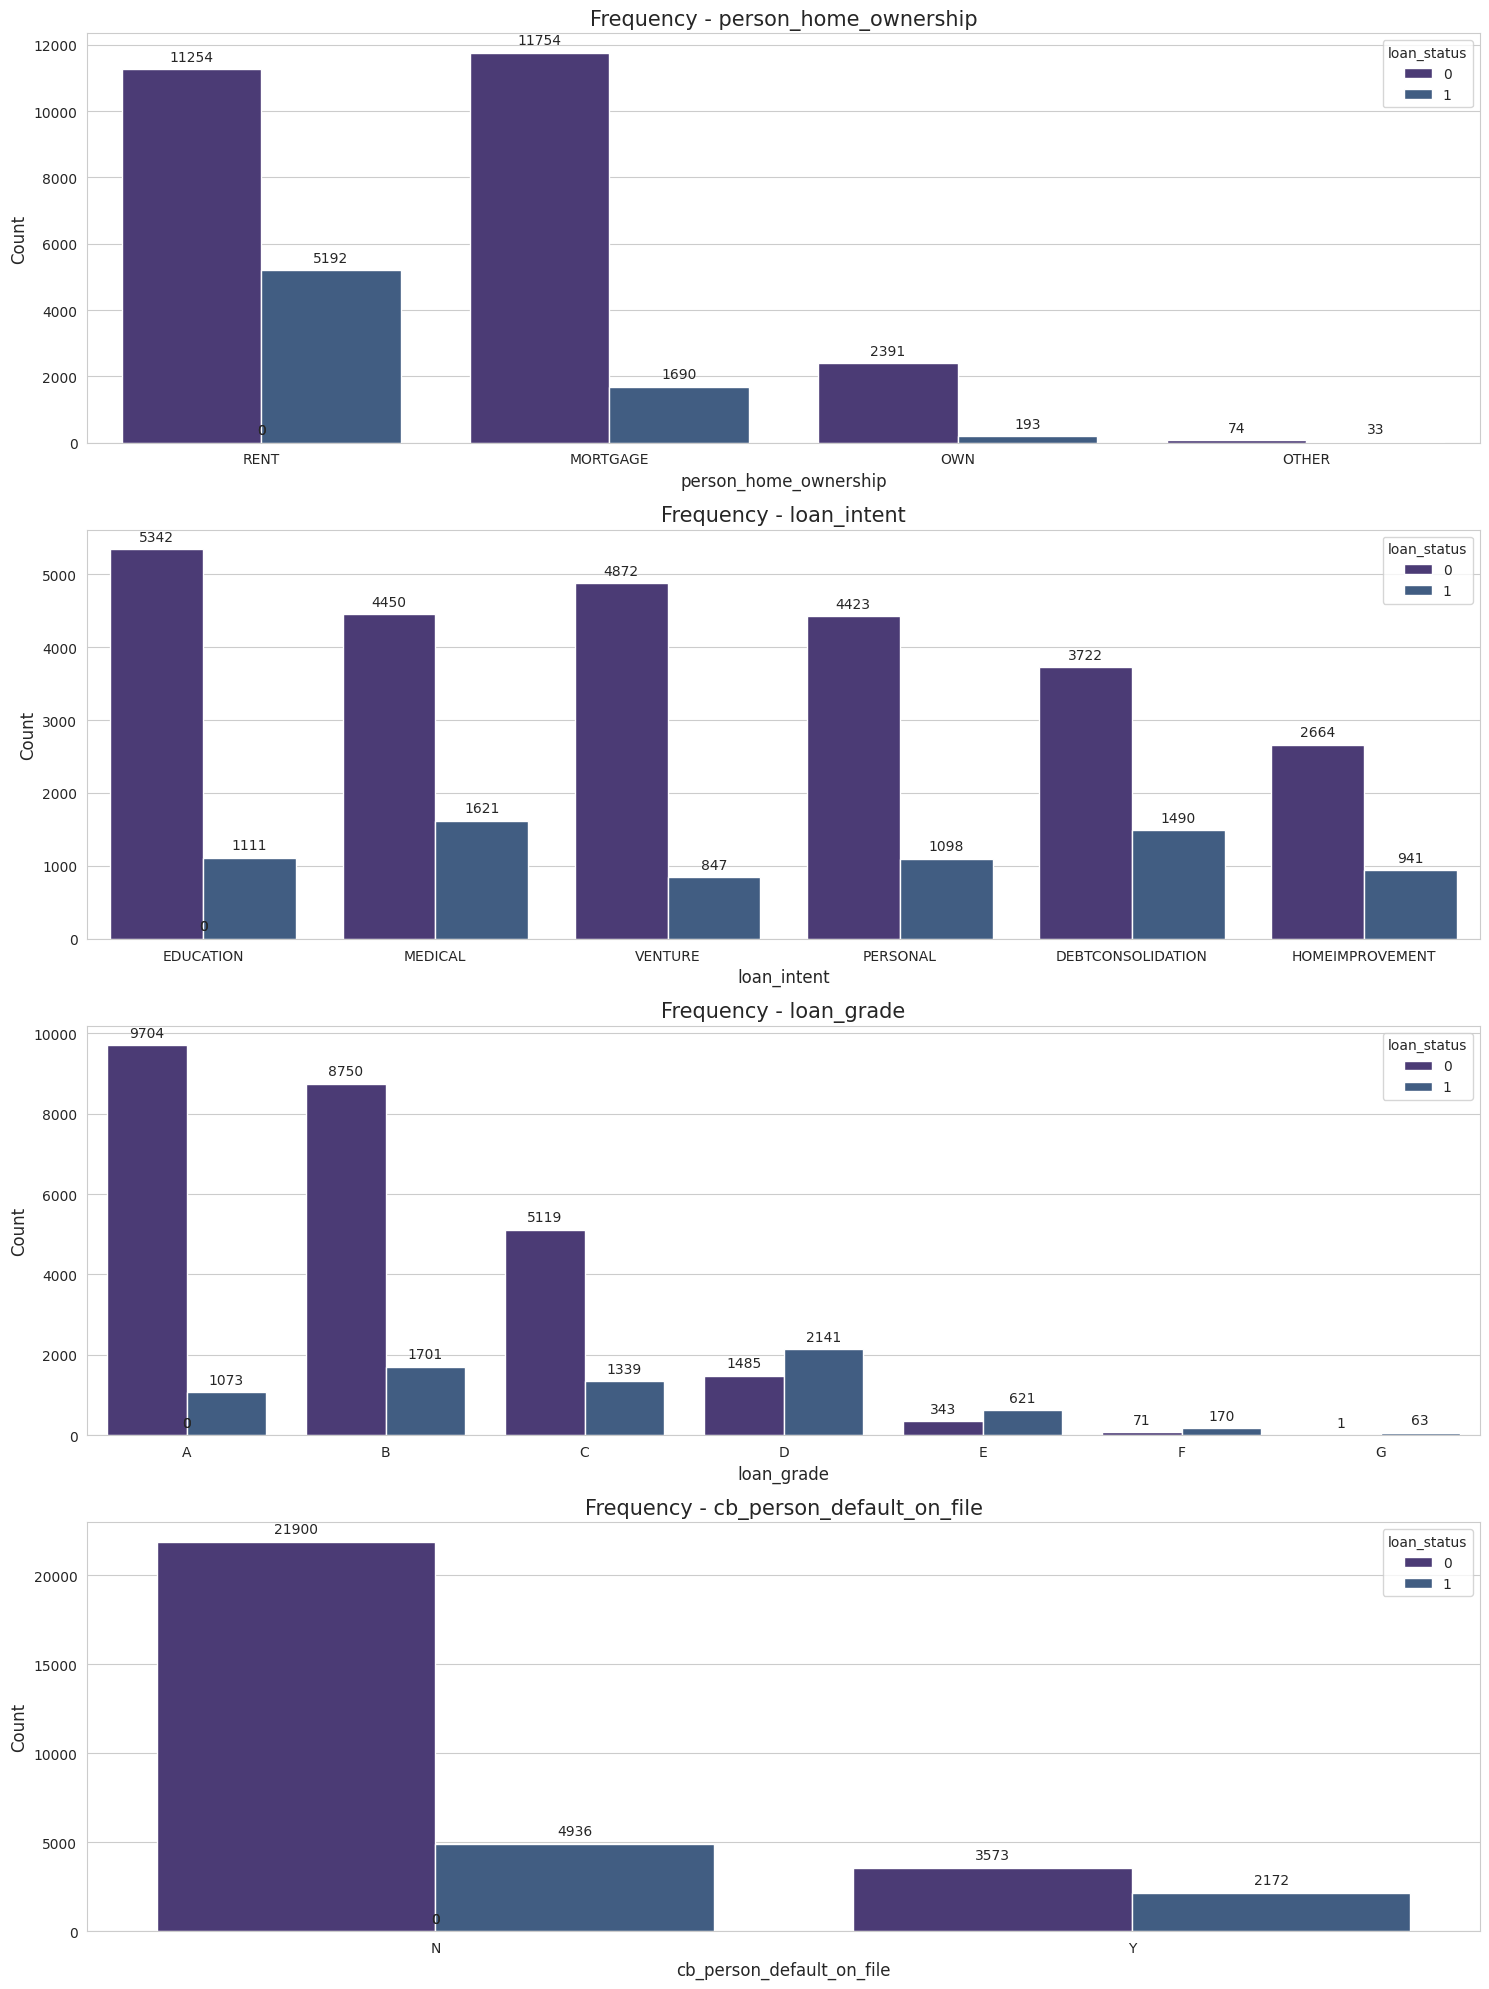

In [19]:
plot_categorical_frequency(categoric_df, hue_column='loan_status')

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

The variable with the highest correlation with loan_status is 'loan_percent_income' with a value of 0.38.


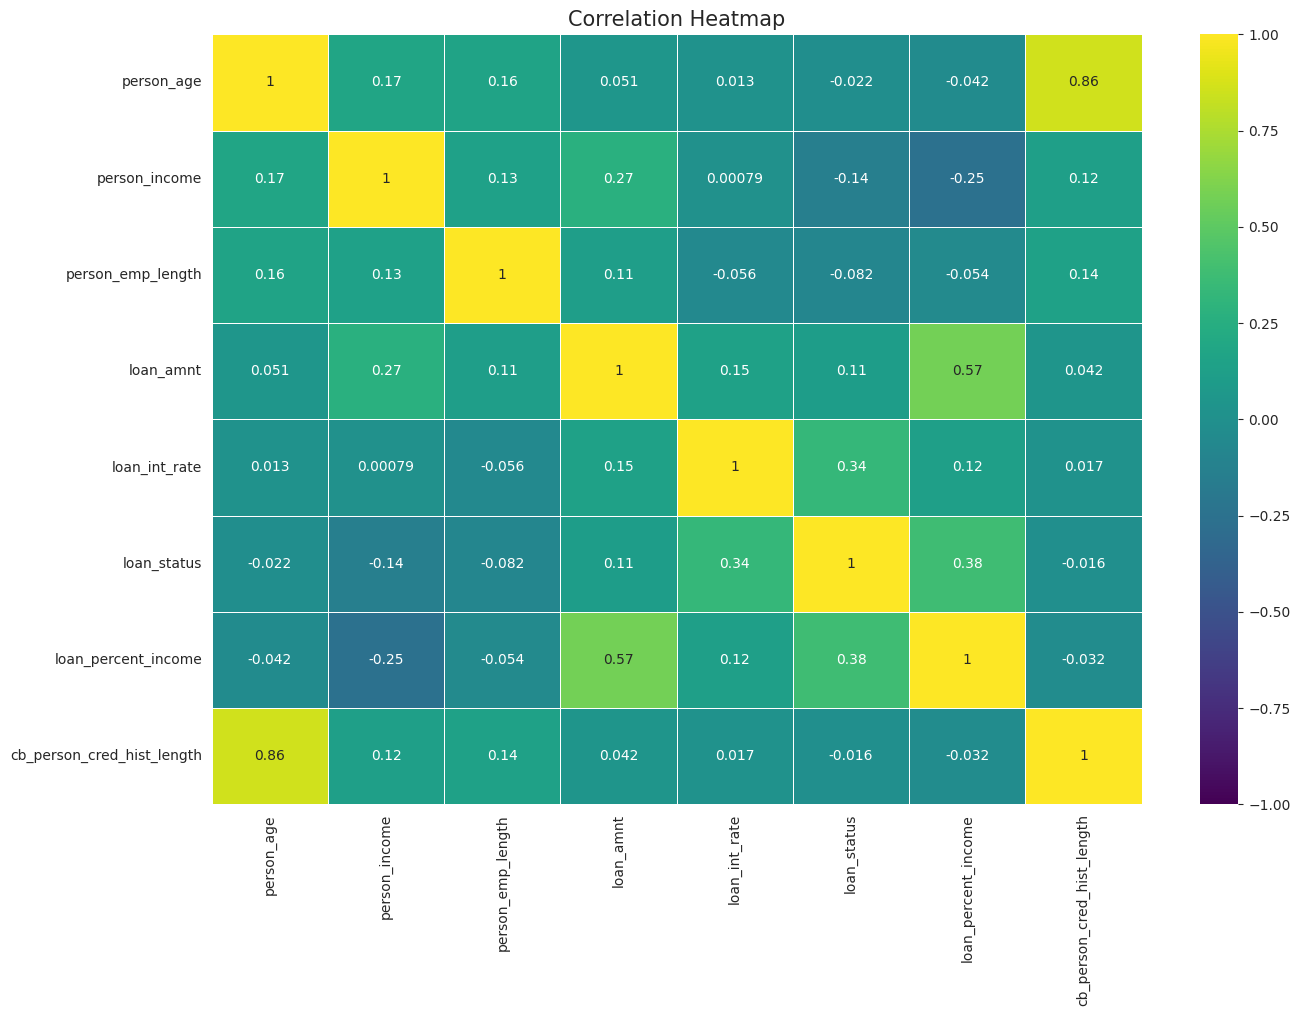

In [20]:
def heatmap_with_correlations(dataframe, target_column):
    
    if dataframe[target_column].dtype in ('object', 'category'):
        dataframe[target_column] = dataframe[target_column].astype('int64')
        
    correlations = dataframe.select_dtypes(include=['int64', 'float64']).corr()

    top_corr = correlations[target_column].drop(target_column).idxmax()
    top_corr_value = correlations[target_column][top_corr]
    
    print(f"The variable with the highest correlation with {target_column} is '{top_corr}' with a value of {top_corr_value:.2f}.")

    plt.figure(figsize=(15, 10))
    sns.heatmap(correlations, annot=True, cmap='viridis', vmin=-1, vmax=1, linewidths=.5)
    plt.title("Correlation Heatmap", fontsize=15)
    plt.show()


heatmap_with_correlations(df, 'loan_status')